In [835]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from tabulate import tabulate
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import levene
from tabulate import tabulate
import statsmodels.stats.api as sms
!pip install pingouin
from pingouin import ancova
pd.options.display.max_columns = None #show all columns in data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Cleaning






In [836]:
#Define dataset url
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"

In [837]:
#Read dataset
dataset = pd.read_csv(url, delimiter = ',')

In [838]:
dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [839]:
#Check for duplicate and null values in a dataset
duplicate_df = []
print("Number of duplicate values in the dataset are-",dataset.duplicated().sum())
print("\n")
print(dataset.isnull().sum())

Number of duplicate values in the dataset are- 0


Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsF

In [840]:
#Data Cleaning
numeric_columns = ["ArrestID","SearchReason_CauseInjury","SearchReason_AssistEscape","SearchReason_PossessWeapons","SearchReason_PossessEvidence","ItemsFound"]
dataset[numeric_columns] = dataset[numeric_columns].fillna(0)
categorical_columns = ["Age_group__at_arrest_", "Occurrence_Category","Perceived_Race"]
dataset[categorical_columns]=dataset[categorical_columns].fillna(dataset.mode().iloc[0])
clean_dataset = dataset
print(clean_dataset.isnull().sum())

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64


In [841]:
clean_dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5


In [842]:
#Remove column values 
clean_dataset = clean_dataset.drop(clean_dataset[clean_dataset['Sex'] == 'U'].index)
clean_dataset = clean_dataset.drop(clean_dataset[clean_dataset['Perceived_Race'] == 'Unknown or Legacy'].index)
#Replace values
clean_dataset=(clean_dataset.replace(to_replace =["Youth (aged 17 years and under)"],value =["Youth (aged 17 and younger)"]))

In [843]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60214 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      60214 non-null  int64  
 1   Arrest_Month                     60214 non-null  object 
 2   EventID                          60214 non-null  int64  
 3   ArrestID                         60214 non-null  float64
 4   PersonID                         60214 non-null  int64  
 5   Perceived_Race                   60214 non-null  object 
 6   Sex                              60214 non-null  object 
 7   Age_group__at_arrest_            60214 non-null  object 
 8   Youth_at_arrest__under_18_years  60214 non-null  object 
 9   ArrestLocDiv                     60214 non-null  object 
 10  StripSearch                      60214 non-null  int64  
 11  Booked                           60214 non-null  int64  
 12  Occurrence_Categor

In [844]:
clean_dataset.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,60214.000000,6.021400e+04,6.021400e+04,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.00000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000,60214.000000
mean,2020.512339,1.030005e+06,5.989662e+06,318584.185339,0.120653,0.522686,0.004185,0.045288,0.039227,0.03446,0.006460,0.446524,0.092703,0.041386,0.054937,0.050702,0.045106,32576.013120
std,0.499852,1.731831e+04,5.065369e+05,10824.009603,0.325726,0.499489,0.064557,0.207938,0.194136,0.18241,0.080117,0.497136,0.290018,0.199182,0.227860,0.219391,0.207538,18896.577278
min,2020.000000,1.000000e+06,0.000000e+00,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015006e+06,6.015893e+06,309176.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16155.250000
50%,2021.000000,1.030034e+06,6.032216e+06,318593.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32545.000000
75%,2021.000000,1.045015e+06,6.048549e+06,327907.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48978.750000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [845]:
#combine clean_dataset for negative behaviour at arrest 
clean_dataset['Negative_Behaviour_at_Arrest'] = (clean_dataset['Actions_at_arrest___Concealed_i'] + clean_dataset['Actions_at_arrest___Combative__']
                                                 + clean_dataset['Actions_at_arrest___Resisted__d']+ clean_dataset['Actions_at_arrest___Mental_inst']+ clean_dataset['Actions_at_arrest___Assaulted_o'])

clean_dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Negative_Behaviour_at_Arrest
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1,0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5,0
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,0,1,Assault,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,6,0


In [846]:
clean_dataset_negative = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'ArrestID', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
clean_dataset_negative.head()

,Arrest_Year,Arrest_Month,ArrestID,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,Negative_Behaviour_at_Arrest
0,2020,Apr-June,0.0,Black,F,Not a youth,Aged 18 to 24 years,0,0
1,2020,Apr-June,0.0,Black,M,Not a youth,Aged 18 to 24 years,0,0
2,2020,Apr-June,0.0,Black,M,Not a youth,Aged 25 to 34 years,0,0
3,2020,Apr-June,0.0,Black,M,Not a youth,Aged 35 to 44 years,0,0
4,2020,Apr-June,0.0,Black,M,Not a youth,Aged 55 to 64 years,0,0


In [847]:
#Added.
clean_dataset_strip_search1 = clean_dataset.groupby(['Arrest_Year','Arrest_Month','StripSearch', 'ArrestID', 'Perceived_Race','Sex','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
clean_dataset_strip_search1.head()

,Arrest_Year,Arrest_Month,StripSearch,ArrestID,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,Negative_Behaviour_at_Arrest
0,2020,Apr-June,0,6000004.0,White,M,Not a youth,Aged 18 to 24 years,1,0
1,2020,Apr-June,0,6000013.0,White,M,Not a youth,Aged 25 to 34 years,0,0
2,2020,Apr-June,0,6000026.0,South Asian,M,Not a youth,Aged 18 to 24 years,0,0
3,2020,Apr-June,0,6000046.0,White,M,Not a youth,Aged 45 to 54 years,0,0
4,2020,Apr-June,0,6000058.0,White,F,Not a youth,Aged 25 to 34 years,0,0


In [848]:
clean_dataset_strip_search_num_arrest1 = clean_dataset.groupby(['Arrest_Year','Arrest_Month','StripSearch', 'ArrestID', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
clean_dataset_strip_search_num_arrest1.head()

clean_dataset_strip_search_num_arrest2 = clean_dataset.groupby(['Arrest_Year','Arrest_Month','StripSearch', 'ArrestID', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Booked'], as_index= False).agg({'Negative_Behaviour_at_Arrest': 'sum'})
clean_dataset_strip_search_num_arrest2.head()

,Arrest_Year,Arrest_Month,StripSearch,ArrestID,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Booked,Negative_Behaviour_at_Arrest
0,2020,Apr-June,0,6000004.0,White,M,Not a youth,Aged 18 to 24 years,1,0
1,2020,Apr-June,0,6000013.0,White,M,Not a youth,Aged 25 to 34 years,0,0
2,2020,Apr-June,0,6000026.0,South Asian,M,Not a youth,Aged 18 to 24 years,0,0
3,2020,Apr-June,0,6000046.0,White,M,Not a youth,Aged 45 to 54 years,0,0
4,2020,Apr-June,0,6000058.0,White,F,Not a youth,Aged 25 to 34 years,0,0


# Number of arrests

## DataSet without Negative Behaviour

In [849]:
#Number of arrests without negative behaviour
number_arrests_no_negative = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_'])['Booked'].count().reset_index()
number_arrests_no_negative = number_arrests_no_negative.rename(columns={'Booked' : 'Number_arrests' })
number_arrests_no_negative.head() 

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,87
1,2020,Apr-June,Black,F,Not a youth,Aged 25 to 34 years,99
2,2020,Apr-June,Black,F,Not a youth,Aged 35 to 44 years,52
3,2020,Apr-June,Black,F,Not a youth,Aged 45 to 54 years,26
4,2020,Apr-June,Black,F,Not a youth,Aged 55 to 64 years,7


In [850]:
print(number_arrests_no_negative[['Sex']].describe())

        Sex
count   745
unique    2
top       M
freq    387


## Dataset with Negative Behaviour

In [851]:
#Number of arrests with negative behaviour at arrest 
number_arrests = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o'])['Booked'].count().reset_index()
number_arrests = number_arrests.rename(columns={'Booked' : 'Number_arrests' })
number_arrests.head()

#combine clean_dataset for negative behaviour at arrest 
number_arrests['Negative_Behaviour_at_Arrest'] = (number_arrests['Actions_at_arrest___Concealed_i'] + number_arrests['Actions_at_arrest___Combative__']
                                                 + number_arrests['Actions_at_arrest___Resisted__d']+ number_arrests['Actions_at_arrest___Mental_inst']+ number_arrests['Actions_at_arrest___Assaulted_o'])

number_arrests.head()

#isolate columns of interest into a new df
number_arrests = number_arrests[['Arrest_Year','Arrest_Month', 'Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Number_arrests','Negative_Behaviour_at_Arrest']].copy()

number_arrests.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests,Negative_Behaviour_at_Arrest
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,72,0
1,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,4,1
2,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,5,1
3,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,2,1
4,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,2


In [852]:
print(number_arrests[['Sex']].describe())

         Sex
count   2798
unique     2
top        M
freq    1840


In [853]:
print(number_arrests[['Number_arrests']].describe())

       Number_arrests
count     2798.000000
mean        21.520372
std         75.284721
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max        810.000000


In [854]:
clean_dataset

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Negative_Behaviour_at_Arrest
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,1,0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2,0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4,0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5,0
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,0,1,Assault,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65270,2021,Oct-Dec,1046034,6029720.0,311475,White,F,Aged 25 to 34 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,65271,0
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,65272,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,65273,0
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,65274,0


## By sex

In [855]:
# number_arrests by sex

number_arrests_sex = clean_dataset.groupby(['Sex'])['Booked'].count().reset_index()
number_arrests_sex  = number_arrests_sex.rename(columns={'Booked' : 'Number_arrests' })

number_arrests_sex = number_arrests_sex.sort_values(by = "Number_arrests", ascending = False)

number_arrests_sex.head()

,Sex,Number_arrests
1,M,48523
0,F,11691


## By Negative Behaviour at Arrest

In [856]:
# number_arrests by negative behaviour at arrest
number_arrests_negative = clean_dataset_negative.groupby(['Negative_Behaviour_at_Arrest'])['Booked'].count().reset_index()
number_arrests_negative = number_arrests_negative.rename(columns={'Booked' : 'Number_arrests' })

number_arrests_negative = number_arrests_negative.sort_values(by = "Number_arrests", ascending = False)

number_arrests_negative.head(10)

,Negative_Behaviour_at_Arrest,Number_arrests
0,0,53981
1,1,4367
2,2,1194
3,3,350


## By Sex and Negative Behaviour 

In [857]:
#number of arrests with sex and negative behaviour only 

#combine clean_dataset for negative behaviour at arrest 

number_arrests_sex_negative = clean_dataset_negative.groupby(['Sex','Negative_Behaviour_at_Arrest'])['Booked'].count().reset_index()
number_arrests_sex_negative  = number_arrests_sex_negative.rename(columns={'Booked' : 'Number_arrests' })


number_arrests_sex_negative.head(20)

,Sex,Negative_Behaviour_at_Arrest,Number_arrests
0,F,0,10488
1,F,1,850
2,F,2,233
3,F,3,76
4,M,0,43493
5,M,1,3517
6,M,2,961
7,M,3,274


In [858]:
#calculate ratio on sex and number of arrests in terms of negative behasviour at arrest
#calculate sex total number
total_by_sex = number_arrests_sex_negative.groupby('Sex')['Number_arrests'].sum()
#create new column called Total 
number_arrests_sex_negative['Total'] = number_arrests_sex_negative['Sex'].apply(lambda x: total_by_sex[x])
#create new column called Ratio
number_arrests_sex_negative['Ratio'] = number_arrests_sex_negative['Number_arrests'] / number_arrests_sex_negative['Total']

number_arrests_sex_negative.head(10)


,Sex,Negative_Behaviour_at_Arrest,Number_arrests,Total,Ratio
0,F,0,10488,11647,0.900489
1,F,1,850,11647,0.072980
2,F,2,233,11647,0.020005
3,F,3,76,11647,0.006525
4,M,0,43493,48245,0.901503
5,M,1,3517,48245,0.072899
6,M,2,961,48245,0.019919
7,M,3,274,48245,0.005679


In [859]:
print(number_arrests_sex_negative[['Sex']].describe())

       Sex
count    8
unique   2
top      F
freq     4


#Strip Search

##Dataset with Negative Behaviour

In [860]:
#Number of arrests with negative behaviour at arrest and strip search
number_arrests_strip_search = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'Perceived_Race','Sex','StripSearch','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o'])['Booked'].count().reset_index()
number_arrests_strip_search = number_arrests_strip_search.rename(columns={'Booked' : 'Number_arrests' })
number_arrests_strip_search.head()

#combine clean_dataset for negative behaviour at arrest 
number_arrests_strip_search['Negative_Behaviour_at_Arrest'] = (number_arrests_strip_search['Actions_at_arrest___Concealed_i'] + number_arrests_strip_search['Actions_at_arrest___Combative__']
                                                 + number_arrests_strip_search['Actions_at_arrest___Resisted__d']+ number_arrests_strip_search['Actions_at_arrest___Mental_inst']+ number_arrests_strip_search['Actions_at_arrest___Assaulted_o'])

number_arrests_strip_search.head()

#isolate columns of interest into a new df
strip_search = number_arrests_strip_search[['Arrest_Year','Arrest_Month', 'Perceived_Race','Sex','StripSearch','Youth_at_arrest__under_18_years','Age_group__at_arrest_','Number_arrests','Negative_Behaviour_at_Arrest']].copy()
strip_search.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,StripSearch,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests,Negative_Behaviour_at_Arrest
0,2020,Apr-June,Black,F,0,Not a youth,Aged 18 to 24 years,59,0
1,2020,Apr-June,Black,F,0,Not a youth,Aged 18 to 24 years,3,1
2,2020,Apr-June,Black,F,0,Not a youth,Aged 18 to 24 years,3,1
3,2020,Apr-June,Black,F,0,Not a youth,Aged 18 to 24 years,2,1
4,2020,Apr-June,Black,F,0,Not a youth,Aged 18 to 24 years,1,2


##Strip search by sex

In [861]:
# strip search by sex

strip_search_sex = clean_dataset.groupby(['Sex'])['StripSearch'].count().reset_index()
# strip_search_sex  = number_arrests_sex.rename(columns={'Booked' : 'Number_arrests' })

strip_search_sex = strip_search_sex.sort_values(by = "StripSearch", ascending = False)

strip_search_sex.head()

,Sex,StripSearch
1,M,48523
0,F,11691


##Strip search by Negative Behaviour

In [862]:
# Strip Search by negative behaviour at arrest

strip_search_negative = clean_dataset_strip_search1.groupby(['Negative_Behaviour_at_Arrest'])['StripSearch'].count().reset_index()

strip_search_negative = strip_search_negative.sort_values(by = "StripSearch", ascending = False)

strip_search_negative.head(10)

,Negative_Behaviour_at_Arrest,StripSearch
0,0,53981
1,1,4367
2,2,1194
3,3,350


##Strip search by Sex and Negative Behaviour

In [863]:
#Strip search with sex and negative behaviour  

strip_search_sex_negative = clean_dataset_strip_search1.groupby(['Sex','Negative_Behaviour_at_Arrest'])['StripSearch'].count().reset_index()
strip_search_sex_negative.head(20)

,Sex,Negative_Behaviour_at_Arrest,StripSearch
0,F,0,10488
1,F,1,850
2,F,2,233
3,F,3,76
4,M,0,43493
5,M,1,3517
6,M,2,961
7,M,3,274


In [864]:
strip_search_number_arrests_sex_negative = clean_dataset_strip_search1.groupby(['Sex','Negative_Behaviour_at_Arrest','Booked'])['StripSearch'].count().reset_index()
strip_search_number_arrests_sex_negative  = strip_search_number_arrests_sex_negative.rename(columns={'Booked' : 'Number_arrests' })

strip_search_number_arrests_sex_negative.head()


,Sex,Negative_Behaviour_at_Arrest,Number_arrests,StripSearch
0,F,0,0,6153
1,F,0,1,4335
2,F,1,0,283
3,F,1,1,567
4,F,2,0,65


In [865]:
#Number of arrests with negative behaviour at arrest 
number_arrests1 = clean_dataset.groupby(['Arrest_Year','Arrest_Month', 'StripSearch','Perceived_Race',"Sex",'Youth_at_arrest__under_18_years','Age_group__at_arrest_','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o'])['Booked'].count().reset_index()
number_arrests1 = number_arrests1.rename(columns={'Booked' : 'Number_arrests'})

number_arrests1.head()

#combine clean_dataset for negative behaviour at arrest 
number_arrests1['Negative_Behaviour_at_Arrest'] = (number_arrests1['Actions_at_arrest___Concealed_i'] + number_arrests1['Actions_at_arrest___Combative__']
                                                 + number_arrests1['Actions_at_arrest___Resisted__d']+ number_arrests1['Actions_at_arrest___Mental_inst']+ number_arrests1['Actions_at_arrest___Assaulted_o'])


#isolate columns of interest into a new df
number_arrests1 = number_arrests1[['StripSearch','Sex','Number_arrests','Arrest_Year','Negative_Behaviour_at_Arrest']].copy()
number_arrests1

,StripSearch,Sex,Number_arrests,Arrest_Year,Negative_Behaviour_at_Arrest
0,0,F,59,2020,0
1,0,F,3,2020,1
2,0,F,3,2020,1
3,0,F,2,2020,1
4,0,F,1,2020,2
...,...,...,...,...,...
3528,1,M,6,2021,0
3529,1,M,2,2021,1
3530,1,M,2,2021,0
3531,1,M,1,2021,1


# EDA

## Numer of Arrests

### Bar Chart by Sex

In [866]:
# number of arrest count by sex 
arrests_sex_bar = px.bar(number_arrests_sex , x="Sex",
             y='Number_arrests',
             labels={
                    "Sex": "Sex",
                    'Number_arrests': "Number of Arrests",},
             color_discrete_map={'M': '#537FE7', 'F': '#FFB84C' },
             title="Number of Arrests by Sex",
             barmode='group',
             height=600, width= 1200 , text_auto='.3s')



arrests_sex_bar.update_traces(textfont_size=17, textangle=0, textposition="inside", cliponaxis=False, width = 0.4)
arrests_sex_bar.show()

### Boxplot by Sex



In [867]:
arrests_sex_boxplot = px.box(number_arrests_no_negative, x="Number_arrests", y="Sex"
            
            ,labels={
                    "Sex": "Sex",
                    'Number_arrests': "Number of Arrests",
                             }         
            , height = 800, width = 1100
             , title= "Boxplot: Number of Arrests by Sex"
            )

arrests_sex_boxplot.show()

### Bar Chart by Negative Behaviour at Arrest

In [868]:
# number of arrest count by negative behaviour
arrests_negative_bar = px.bar(number_arrests_negative , x="Negative_Behaviour_at_Arrest",
             y='Number_arrests',
             labels={
                    "Negative_Behaviour_at_Arrest": "Negative Behaviour at Arrest",
                    'Number_arrests': "Number of Arrests",},
             color_discrete_map={'M': '#537FE7', 'F': '#FFB84C' },
             title="Number of Arrests by Negative Behaviour at Arrest",
             barmode='group',
             height=600, width= 700 , text_auto='.3s')



arrests_negative_bar.update_traces(textfont_size=17, textangle=0, textposition="outside", cliponaxis=False, marker_line_width=0)
arrests_negative_bar.show()

In [869]:
arrests_sex_negative_bar1 = px.bar(data_frame = number_arrests_sex_negative
                           ,x = "Negative_Behaviour_at_Arrest", y = 'Number_arrests', color = 'Sex',
                           labels={
                           "Negative_Behaviour_at_Arrest": "Negative Behaviour at Arrest",
                           'Number_arrests': "Number of Arrests",
                             }

                       , color_discrete_map={'M': '#537FE7', 'F': '#E74646' }
                      , text_auto='.4s'
                      , title= "Number of Arrests by Sex and Negative Behaviour at Arrest 1"
                      , facet_col_wrap = 4
                       ,height=600, width=1000
                                     
                      )

arrests_sex_negative_bar1.update_traces(textfont_size=24, textangle=0, textposition="inside", cliponaxis=False, width= 0.65)

### Bar Chart by Sex and Negative Behaviour at Arrest

In [870]:
arrest_sex_negative_bar = px.bar(data_frame = number_arrests_sex_negative
                           ,x = "Sex", y = 'Number_arrests', color="Sex"
                       , color_discrete_map={'M': '#537FE7', 'F': '#E74646' }
                      , facet_col = "Negative_Behaviour_at_Arrest",
                      labels={
                           "Sex": "Sex",
                           'Number_arrests': "Number of arrests",
                           "Negative_Behaviour_at_Arrest" : "Negative Behaviour at Arrest"
                             } 
                                
               
                      , text_auto='.2s'
                                  ,height=650, width=1000
                      , title= "Number of Arrests by Sex and Negative Behaviour at Arrest 2"
                      )

arrest_sex_negative_bar.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

### Interaction Plot by Sex and Negative Behaviour at Arrest




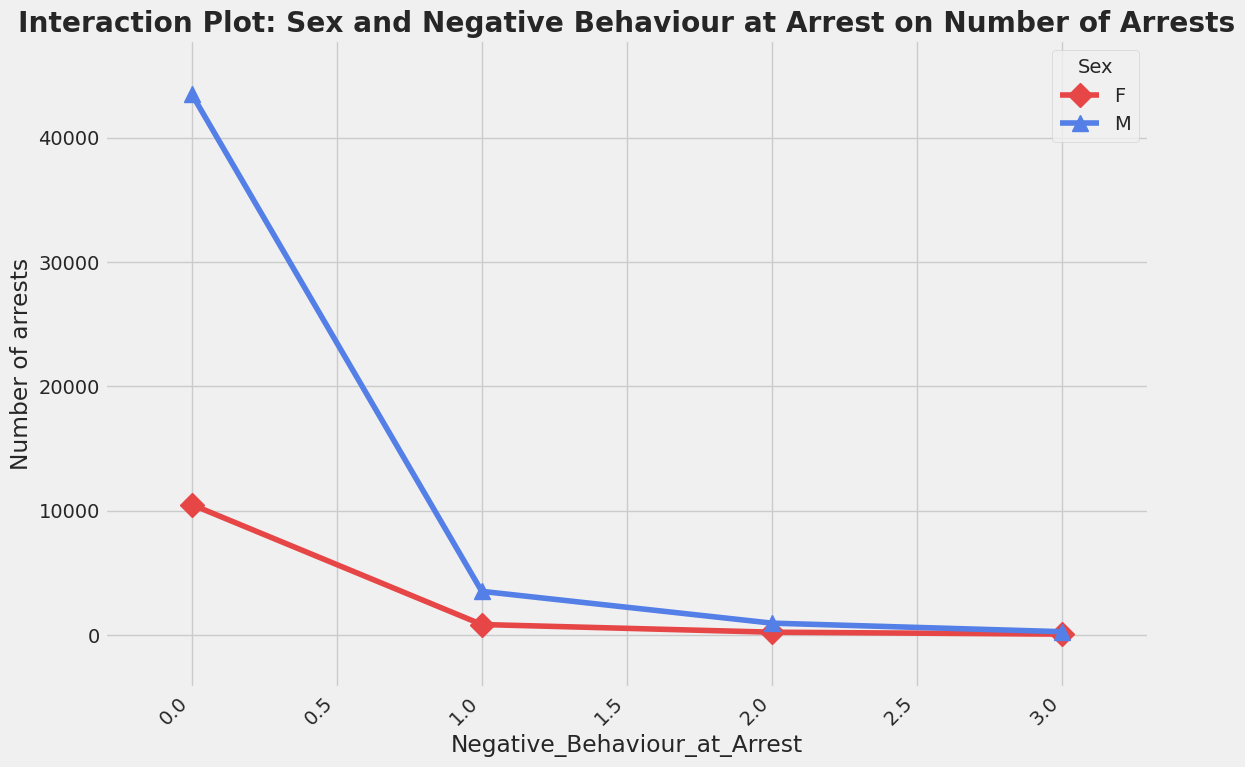

In [871]:
#plot an interaction plot 
#refer to: https://www.statsmodels.org/dev/generated/statsmodels.graphics.factorplots.interaction_plot.html
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(12, 8))
sex = number_arrests_sex_negative['Sex'].astype("category")
arrest_number = number_arrests_sex_negative['Number_arrests'].values

sex_race_interact_arrests = interaction_plot(number_arrests_sex_negative['Negative_Behaviour_at_Arrest'], sex, arrest_number, colors=['#E74646', '#537FE7'], markers=['D','^'], ms=12,ax=ax)

plt.ylabel('Number of arrests')
plt.xlabel('Negative_Behaviour_at_Arrest')
plt.title('Interaction Plot: Sex and Negative Behaviour at Arrest on Number of Arrests', fontweight='bold')
plt.xticks(rotation=45, ha = 'right')
plt.show()

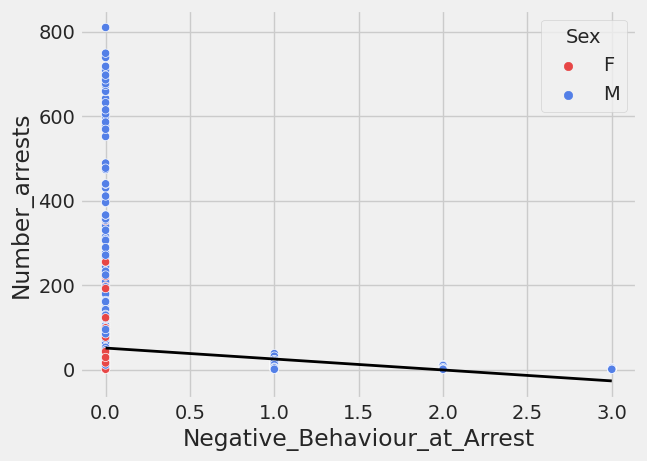

In [872]:
from scipy.stats import linregress


sns.scatterplot(data=number_arrests,
    x="Negative_Behaviour_at_Arrest", y="Number_arrests", hue="Sex",palette={'M': '#537FE7', 'F': '#E74646'}
    )

# Calculate and add best fit line with equation
slope, intercept, r_value, p_value, std_err = linregress(number_arrests['Negative_Behaviour_at_Arrest'], number_arrests['Number_arrests'])
plt.plot(number_arrests['Negative_Behaviour_at_Arrest'], slope*number_arrests['Negative_Behaviour_at_Arrest'] + intercept, color='black', linewidth=2)


# Show plot
plt.show()

##Strip Search

###Bar chart of strip search by sex

In [873]:
stripsearch_sex_bar = px.bar(number_arrests1 , x="Sex", 
             y='StripSearch',
             labels={
                    "Sex": "Sex",
                    'StripSearch': "Strip Search"},
             color_discrete_sequence=['#1F77B4', '#FF7F0E'],
             color_continuous_scale=[[0, '#FFFFFF'], [1, '#1F77B4'], [1, '#FF7F0E']],
             title="Strip Search by Sex",
             barmode='group',
             height=600, width= 1200 , text_auto='.3s')

stripsearch_sex_bar.update_traces(textfont_size=17, textangle=0, textposition="inside", cliponaxis=False, width = 0.4)
stripsearch_sex_bar.show()


###Bar chart of strip search by sex for both scenarios

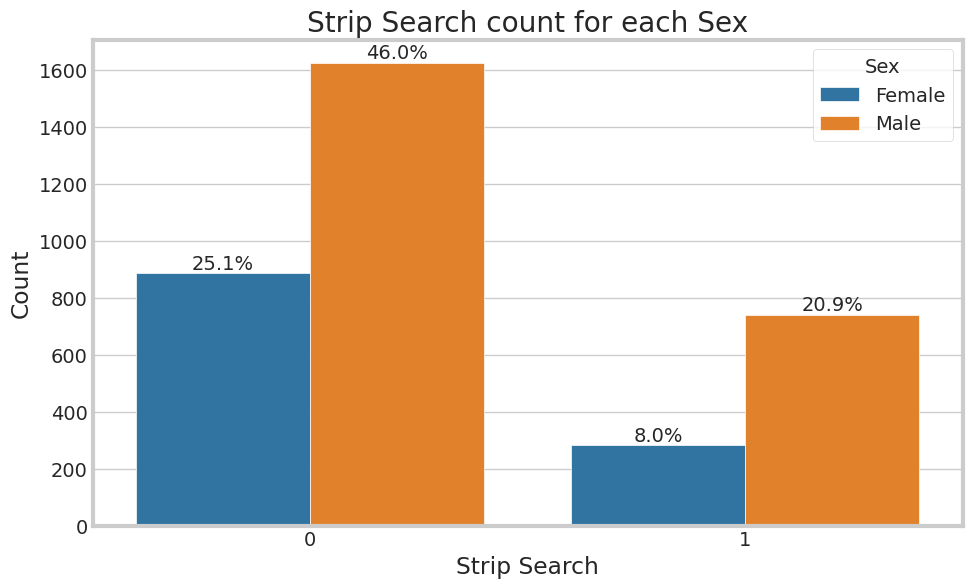

In [874]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=number_arrests1, x="StripSearch", hue="Sex", palette=['#1F77B4', '#FF7F0E'])
ax.set_xlabel('Strip Search')
ax.set_ylabel('Count')
ax.set_title('Strip Search count for each Sex')
ax.legend(title="Sex", labels=["Female", "Male"])

# Adding percentages on top of the bars
total = len(number_arrests1)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=14)

plt.show()


###Bar Chart for Strip Search by Sex and Number of Arrests

In [875]:
arrest_sex_strip = number_arrests1[['Sex','Number_arrests','StripSearch']].copy()

arrest_sex_strip.head()

,Sex,Number_arrests,StripSearch
0,F,59,0
1,F,3,0
2,F,3,0
3,F,2,0
4,F,1,0


In [876]:
arrest_sex_strip_bar = px.bar(data_frame = arrest_sex_strip
                           ,x = "Sex", y = 'Number_arrests', color="Sex"
                       , color_discrete_map={'M': '#537FE7', 'F': '#E74646' }
                      , facet_col = "StripSearch",
                      labels={
                           "Sex": "Sex",
                           'Number_arrests': "Number of arrests",
                           "StripSearch" : "StripSearch"
                             } 
                                
               
           
                                  ,height=650, width=1000
                      , title= "Strip Search by Sex and Number of Arrests"
                      )

arrest_sex_strip_bar.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


# ANCOVA

### Shapiro Wilk Normality Test

In [877]:
#Dependant Variable
number_arrests_quantative_column = ["Number_arrests"]

# Loop through each column of the DataFrame and perform the Shapiro-Wilk test
for column in number_arrests_quantative_column:
    stat, p = shapiro(number_arrests[column])
    alpha = 0.05
    if p > alpha:
        print(f'{column} is normally distributed (p={p:.3f})')
    else:
        print(f'{column} is not normally distributed (p={p:.3f})')

Number_arrests is not normally distributed (p=0.000)


In [878]:
number_arrests.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests,Negative_Behaviour_at_Arrest
0,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,72,0
1,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,4,1
2,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,5,1
3,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,2,1
4,2020,Apr-June,Black,F,Not a youth,Aged 18 to 24 years,1,2


## Levene's test

In [879]:
#define male and female arrest sample
arrests_male = number_arrests[number_arrests['Sex'] == "M"]['Number_arrests']
arrests_female = number_arrests[number_arrests['Sex'] == "F"]['Number_arrests']

In [880]:
#Levene's test
stat, p = levene(arrests_male, arrests_female)
print('Test statistic:', stat)
print('p-value:', p)

#variances of the groups are not equal.

Test statistic: 22.53142042265452
p-value: 2.171376925103312e-06


## T Test

In [881]:
#t test 
t_statistic, p_value = ttest_ind(arrests_male, arrests_female, equal_var=False)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 6.060741429746947
p-value: 1.5531223302469866e-09


## Power Analysis 

In [882]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [883]:
Male_sex_size = number_arrests[number_arrests['Sex']=="M"]
Female_sex_size = number_arrests[number_arrests['Sex']=="F"]

In [884]:
Male_sex_size.head()

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Youth_at_arrest__under_18_years,Age_group__at_arrest_,Number_arrests,Negative_Behaviour_at_Arrest
29,2020,Apr-June,Black,M,Not a youth,Aged 18 to 24 years,344,0
30,2020,Apr-June,Black,M,Not a youth,Aged 18 to 24 years,2,1
31,2020,Apr-June,Black,M,Not a youth,Aged 18 to 24 years,6,1
32,2020,Apr-June,Black,M,Not a youth,Aged 18 to 24 years,10,1
33,2020,Apr-June,Black,M,Not a youth,Aged 18 to 24 years,1,2


In [885]:
Male_number_arrests = Male_sex_size['Number_arrests']
Female_number_arrests = Female_sex_size['Number_arrests']

In [886]:
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(Male_number_arrests,Female_number_arrests)
alpha = 0.05
power = 0.8
ratio_= len(Male_number_arrests)/len(Female_number_arrests) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Number of Arrest:',effect_size)

Effect size (Cohen's D) for Number of Arrest: 0.18890884451568302


In [887]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Male_number_arrests') 
print('Actual size of Male_number_arrests:', len(Male_number_arrests))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Female_number_arrests')
print('Actual size of Female_number_arrests:', len(Female_number_arrests))  

Sample Size of nobs1: 335.109 needed for Male_number_arrests
Actual size of Male_number_arrests: 1840
Sample Size of nobs2: 643.634 needed for Female_number_arrests
Actual size of Female_number_arrests: 958


The higher the statistical power for a given experiment, the lower the probability of making a Type II 

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



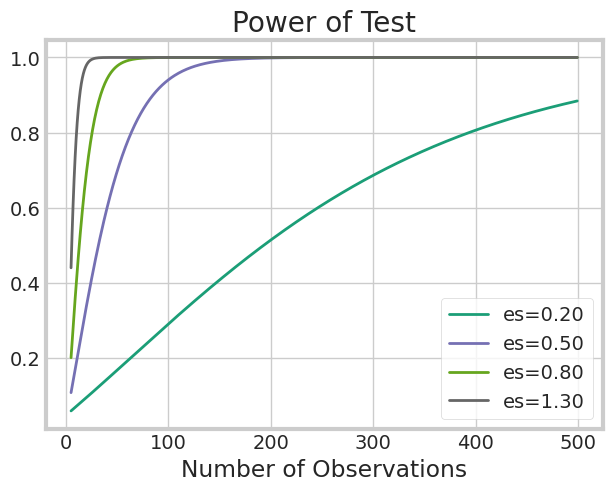

In [888]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 500))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes)

plt.show()

## ANCOVA Test

In [889]:
number_arrests['Sex'].unique()

array(['F', 'M'], dtype=object)

In [890]:
number_arrests['Negative_Behaviour_at_Arrest'].unique()

array([0, 1, 2, 3])

In [891]:
number_arrests['Number_arrests'].unique()

array([ 72,   4,   5,   2,   1,  85,  42,   3,  21,   7,  34, 344,   6,
        10, 474,  17,  16,  15, 267,   8,   9, 129,  58,  77,  11,  73,
        83,  69,  27,  31,  50,  29,  18,  26,  43,  36,  12,  70,  55,
        32,  19,  92,  75,  20, 163, 156,  67,  30,  23, 214, 642, 569,
        22, 409,  13, 230,  38, 105, 122,  59,  88, 431, 658,  24, 340,
       133,  65, 208,  14, 107, 104,  87,  45,  37,  64,  49,  89,  41,
        28,  25,  93,  76,  63, 352, 218, 115, 315, 810, 704, 489, 276,
       152,  82, 117,  56, 403, 599, 364, 157,  80, 109, 121,  51,  53,
        35, 110,  66,  61, 212, 182, 101, 196, 709, 659, 430, 269,  84,
       108, 330, 552, 146,  60,  81, 103,  90,  47,  33,  46, 106,  68,
        57, 200, 158, 577, 632, 395, 221,  95, 114, 309, 605, 354, 168,
        99, 136, 113,  40, 124,  78, 247, 206, 673, 718, 439, 244, 123,
        79,  44, 357, 586, 396, 165, 100, 224, 119,  39, 677, 741, 440,
       233, 127, 306, 615, 366, 179, 125, 198, 739, 749, 477, 25

In [892]:
#isolate columns of sex into a new df
number_arrests__sex_1way = number_arrests[['Sex', 'Negative_Behaviour_at_Arrest', 'Number_arrests']].copy()

number_arrests__sex_1way.head()

,Sex,Negative_Behaviour_at_Arrest,Number_arrests
0,F,0,72
1,F,1,4
2,F,1,5
3,F,1,2
4,F,2,1


In [893]:
print(number_arrests__sex_1way[['Number_arrests']].describe())

       Number_arrests
count     2798.000000
mean        21.520372
std         75.284721
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max        810.000000


In [894]:
#inspect the data is stored correctly in the df
number_arrests__sex_1way.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sex                           2798 non-null   object
 1   Negative_Behaviour_at_Arrest  2798 non-null   int64 
 2   Number_arrests                2798 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 65.7+ KB


In [895]:
#what is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=number_arrests__sex_1way, dv='Number_arrests', covar='Negative_Behaviour_at_Arrest', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,3.087234e+05,1,61.808899,5.357803e-15,0.021636
1,Negative_Behaviour_at_Arrest,1.765871e+06,1,353.541558,2.306641e-74,0.112287
2,Residual,1.396048e+07,2795,NaN,NaN,NaN


# Logistic Regression

In [896]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()

number_arrests1
number_arrests1 = number_arrests1[number_arrests1['Sex'].isin(['F', 'M'])]
number_arrests1['Sex'] = label_encoder.fit_transform(number_arrests1['Sex'])


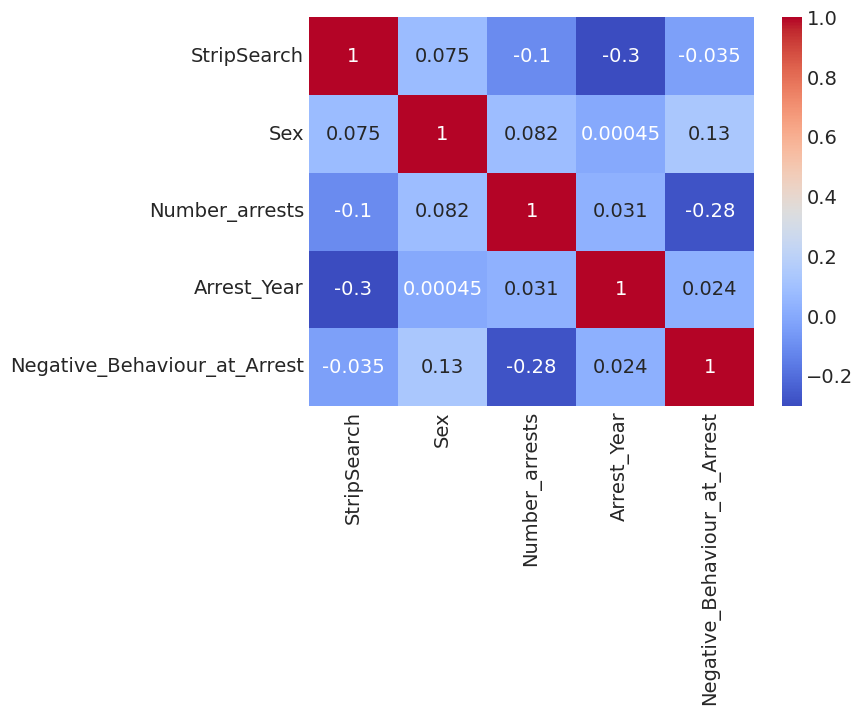

In [897]:
# Compute the correlation matrix
corr_matrix = number_arrests1.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [898]:
#isolate columns of interest into a new df
number_arrests1 = number_arrests1[['StripSearch','Sex','Number_arrests']].copy()
number_arrests1

,StripSearch,Sex,Number_arrests
0,0,0,59
1,0,0,3
2,0,0,3
3,0,0,2
4,0,0,1
...,...,...,...
3528,1,1,6
3529,1,1,2
3530,1,1,2
3531,1,1,1


In [899]:
number_arrests1.shape

(3533, 3)

In [900]:
x = number_arrests1[['Sex','Number_arrests']]
y = number_arrests1[['StripSearch']]

In [901]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=5)

In [902]:
#Import SMOTE class
from imblearn.over_sampling import SMOTE

#Initiaite smote
smote = SMOTE(random_state=2178)

In [903]:
#Oversampling on the training data
x_train, y_train = smote.fit_resample(x_train, y_train)

log_1 = LogisticRegression()
log_1.fit(x_train,y_train)
y_predict = log_1.predict(x_test)
log_1.score(x_test,y_test)
confusion_matrix(y_test,y_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([[249, 257],
       [ 65, 136]])

In [904]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

Formula:  StripSearch ~ Sex + Number_arrests 



In [905]:
reg = smf.logit('StripSearch ~ Sex + Number_arrests', data=trainingdata).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.675054
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                 4010
Model:                          Logit   Df Residuals:                     4007
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.02610
Time:                        03:57:25   Log-Likelihood:                -2707.0
converged:                       True   LL-Null:                       -2779.5
Covariance Type:            nonrobust   LLR p-value:                 3.093e-32
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1094      0.058     -1.891      0.059      -0.223       0.004
Sex              

In [906]:
np.exp(reg.params)

Intercept         0.896409
Sex               1.412636
Number_arrests    0.988097
dtype: float64

In [907]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.800343,1.004006,0.896409
Sex,1.234082,1.617024,1.412636
Number_arrests,0.985152,0.991052,0.988097


In [908]:
#Normalise parameter to get % value of each unique value
number_arrests1['StripSearch'].value_counts(normalize=True)

0    0.710727
1    0.289273
Name: StripSearch, dtype: float64

In [909]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.5445544554455446


In [910]:
cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[249 257]
 [ 65 136]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



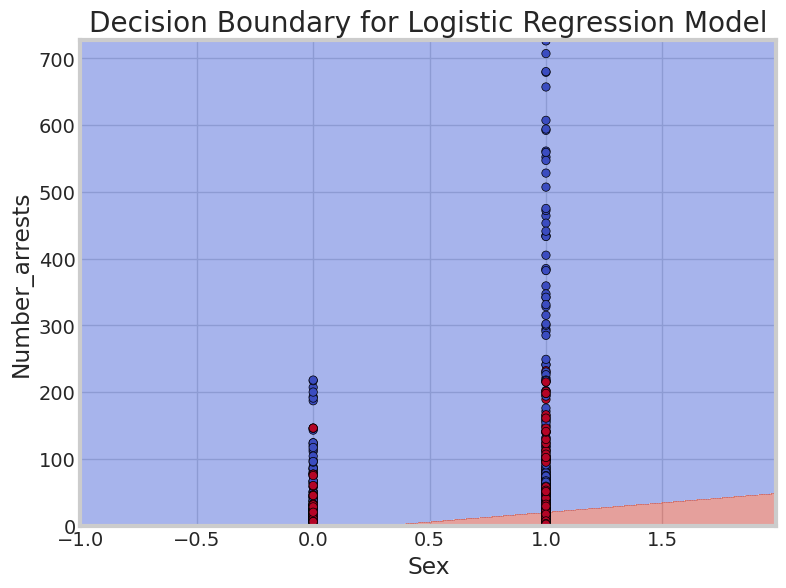

In [911]:
# Create a meshgrid of points to predict on
h = 0.01
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the classes of the meshgrid points
Z = log_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train.iloc[:,0], cmap="coolwarm", edgecolors="k")
plt.xlabel("Sex")
plt.ylabel("Number_arrests")
plt.title("Decision Boundary for Logistic Regression Model")
plt.show()

In [912]:
log_1.coef_

array([[ 0.3438231 , -0.01197275]])

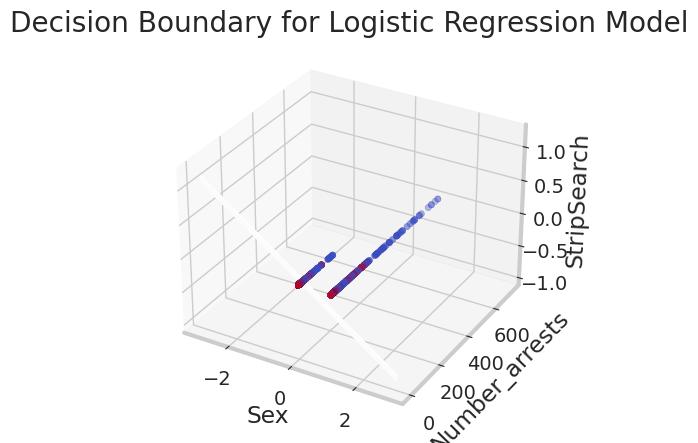

In [913]:
from mpl_toolkits import mplot3d

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
zz = -(log_1.intercept_[0] + log_1.coef_[0][0]*xx + log_1.coef_[0][1]*yy) 

# Plot the decision boundary surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Plot the training points on the same plot
ax.scatter3D(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train, cmap='coolwarm')
ax.set_xlabel('Sex')
ax.set_ylabel('Number_arrests')
ax.set_zlabel('StripSearch')
ax.set_title('Decision Boundary for Logistic Regression Model')
plt.show()

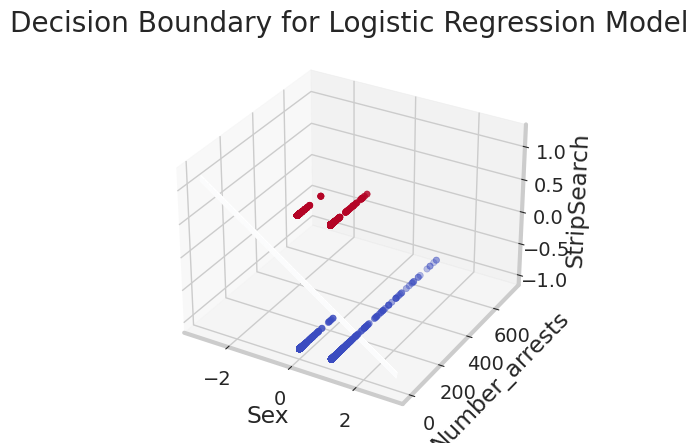

In [914]:
# Create a new variable Z based on StripSearch
Z = np.where(y_train == 0, -1, 1)

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
zz = -(log_1.intercept_[0] + log_1.coef_[0][0]*xx + log_1.coef_[0][1]*yy) 

# Plot the decision boundary surface
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Plot the training points on the same plot with different z values based on ItemsFound
ax.scatter3D(x_train.iloc[:,0], x_train.iloc[:,1],Z, c=y_train, cmap='coolwarm')
ax.set_xlabel('Sex')
ax.set_ylabel('Number_arrests')
ax.set_zlabel('StripSearch')
ax.set_title('Decision Boundary for Logistic Regression Model')
plt.show()

In [915]:
x_resampled, y_resampled = smote.fit_resample(x, y)
df_resampled = pd.DataFrame(np.column_stack((x_resampled, y_resampled)), columns=list(x.columns) + ['StripSearch'])

# check the number of instances in each class
df_resampled


,Sex,Number_arrests,StripSearch
0,0,59,0
1,0,3,0
2,0,3,0
3,0,2,0
4,0,1,0
...,...,...,...
5017,0,6,1
5018,1,1,1
5019,0,1,1
5020,1,17,1


In [916]:
df_resampled.describe()

,Sex,Number_arrests,StripSearch
count,5022.000000,5022.000000,5022.00000
mean,0.678216,14.044604,0.50000
std,0.467207,52.224772,0.50005
min,0.000000,1.000000,0.00000
25%,0.000000,1.000000,0.00000
50%,1.000000,2.000000,0.50000
75%,1.000000,6.000000,1.00000
max,1.000000,727.000000,1.00000


##Box-Tidwell Test 

In [917]:
import statsmodels.api as sm
from statsmodels.api import GLM, families

# Define continuous variables
continuous_DV = ['Number_arrests']

# Add logit transform interaction terms (natural log) for continuous variables e.g.. Age * Log(Age)
for var in continuous_DV:
    number_arrests1[f'{var}:Log_{var}'] = number_arrests1[var].apply(lambda x: x * np.log(x))

# Keep columns related to continuous variables
cols_to_keep = continuous_DV + number_arrests1.columns.tolist()[-len(continuous_DV):]

# Redefining variables to include interaction terms
X_lt = number_arrests1[cols_to_keep]

# Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Building model and fit the data (using statsmodel's Logit)
logit_results = GLM(y, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            StripSearch   No. Observations:                 3533
Model:                            GLM   Df Residuals:                     3530
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.7
Date:                Sun, 16 Apr 2023   Deviance:                       4169.3
Time:                        03:57:41   Pearson chi2:                 3.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02263
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Number

##Prediction Interval

In [918]:
y_pred_prob = log_1.predict_proba(x_test)[:,1]  

In [919]:
n = len(x_test)
variance = y_pred_prob * (1 - y_pred_prob) / n

In [920]:
standard_error = np.sqrt(variance)

In [921]:
from scipy.stats import norm
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

In [922]:
lower_bound = y_pred_prob - z_score * standard_error
upper_bound = y_pred_prob + z_score * standard_error

In [923]:
prediction_interval_df = pd.DataFrame({'lr_pi_lower':lower_bound,'lr_pi_upper':upper_bound})
prediction_interval_df
pci_low = prediction_interval_df.iloc[:,0]
pci_low
pci_high = prediction_interval_df.iloc[:,1]

In [924]:
prediction_interval_df.head(6)

,lr_pi_lower,lr_pi_upper
0,0.510088,0.583476
1,0.510088,0.583476
2,0.519040,0.592294
3,0.397868,0.470943
4,0.421343,0.494795
5,0.519040,0.592294
